In [21]:
import matplotlib as mpl
import seaborn as sns
import bokeh as bk
import numpy as np
import pandas as pd

from pathlib import Path

In [ ]:
cwd = Path.cwd()
data_dir = cwd.parent / 'data'
data_dir.mkdir(exist_ok=True)

df = pd.read_excel(data_dir / 'data.xlsx', sheet_name='Per gemeente', header=[2])
df.dropna(how='all', axis=1, inplace=True)
df

,refnis,lokaliteit,jaar,periode,aantal transacties,mediaan prijs(€),eerste kwartiel prijs(€),derde kwartiel prijs(€),aantal transacties.1,mediaan prijs(€).1,eerste kwartiel prijs(€).1,derde kwartiel prijs(€).1,aantal transacties.2,mediaan prijs(€).2,eerste kwartiel prijs(€).2,derde kwartiel prijs(€).2,aantal transacties.3,mediaan prijs(€).3,eerste kwartiel prijs(€).3,derde kwartiel prijs(€).3
0,11001,AARTSELAAR,2010,Q1,29.0,252000.0,225000.0,290000.0,25.0,247000.0,220000.0,265000.0,4.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN
1,11001,AARTSELAAR,2010,Q2,25.0,254000.0,212000.0,289000.0,20.0,251250.0,209000.0,275000.0,5.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN
2,11001,AARTSELAAR,2010,Q3,21.0,255000.0,235000.0,285000.0,18.0,250000.0,230000.0,275000.0,3.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,11001,AARTSELAAR,2010,Q4,28.0,245000.0,210000.0,312500.0,21.0,245000.0,205000.0,280000.0,7.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN
4,11001,AARTSELAAR,2011,Q1,23.0,310000.0,220000.0,370000.0,18.0,280000.0,220000.0,360000.0,5.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,93090,VIROINVAL,2024,Q1,25.0,130000.0,100000.0,176000.0,18.0,121500.0,90000.0,135000.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34461,93090,VIROINVAL,2024,Q2,19.0,120000.0,53000.0,200000.0,10.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
34462,93090,VIROINVAL,2024,Q3,16.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34463,93090,VIROINVAL,2024,Q4,33.0,125000.0,88000.0,174000.0,19.0,117500.0,88000.0,136000.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
TYPE_0 = 'houses'
TYPE_1 = 'houses_2_3_walls'
TYPE_2 = 'houses_4_walls'
TYPE_3 = 'apartments'

def get_type_mapping(column_name):
    if "." not in column_name :
        return TYPE_0
    elif column_name.endswith(".1"):
        return TYPE_1
    elif column_name.endswith(".2"):
        return TYPE_2       
    elif column_name.endswith(".3"):
        return TYPE_3
    else:
        raise ValueError(f"Unknown type: {column_name}")

mapping = {
    "aantal transacties": "count",
    "mediaan prijs(€)": "mean_euro",
    "eerste kwartiel prijs(€)": "q1_euro",
    "derde kwartiel prijs(€)": "q3_euro",
}


complete_mapping = {**mapping, **{k: f"{mapping[k.split('.')[0]]}_{get_type_mapping(k)}" for k in df.columns if k.split('.')[0] in mapping}}
complete_mapping

{'aantal transacties': 'count_houses',
 'mediaan prijs(€)': 'mean_euro_houses',
 'eerste kwartiel prijs(€)': 'q1_euro_houses',
 'derde kwartiel prijs(€)': 'q3_euro_houses',
 'aantal transacties.1': 'count_houses_2_3_walls',
 'mediaan prijs(€).1': 'mean_euro_houses_2_3_walls',
 'eerste kwartiel prijs(€).1': 'q1_euro_houses_2_3_walls',
 'derde kwartiel prijs(€).1': 'q3_euro_houses_2_3_walls',
 'aantal transacties.2': 'count_houses_4_walls',
 'mediaan prijs(€).2': 'mean_euro_houses_4_walls',
 'eerste kwartiel prijs(€).2': 'q1_euro_houses_4_walls',
 'derde kwartiel prijs(€).2': 'q3_euro_houses_4_walls',
 'aantal transacties.3': 'count_apartments',
 'mediaan prijs(€).3': 'mean_euro_apartments',
 'eerste kwartiel prijs(€).3': 'q1_euro_apartments',
 'derde kwartiel prijs(€).3': 'q3_euro_apartments'}

In [ ]:
df = df.rename(columns=complete_mapping)
df

,refnis,lokaliteit,jaar,periode,count_houses,mean_euro_houses,q1_euro_houses,q3_euro_houses,count_houses_2_3_walls,mean_euro_houses_2_3_walls,q1_euro_houses_2_3_walls,q3_euro_houses_2_3_walls,count_houses_4_walls,mean_euro_houses_4_walls,q1_euro_houses_4_walls,q3_euro_houses_4_walls,count_apartments,mean_euro_apartments,q1_euro_apartments,q3_euro_apartments
0,11001,AARTSELAAR,2010,Q1,29.0,252000.0,225000.0,290000.0,25.0,247000.0,220000.0,265000.0,4.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN
1,11001,AARTSELAAR,2010,Q2,25.0,254000.0,212000.0,289000.0,20.0,251250.0,209000.0,275000.0,5.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN
2,11001,AARTSELAAR,2010,Q3,21.0,255000.0,235000.0,285000.0,18.0,250000.0,230000.0,275000.0,3.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,11001,AARTSELAAR,2010,Q4,28.0,245000.0,210000.0,312500.0,21.0,245000.0,205000.0,280000.0,7.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN
4,11001,AARTSELAAR,2011,Q1,23.0,310000.0,220000.0,370000.0,18.0,280000.0,220000.0,360000.0,5.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,93090,VIROINVAL,2024,Q1,25.0,130000.0,100000.0,176000.0,18.0,121500.0,90000.0,135000.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34461,93090,VIROINVAL,2024,Q2,19.0,120000.0,53000.0,200000.0,10.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
34462,93090,VIROINVAL,2024,Q3,16.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34463,93090,VIROINVAL,2024,Q4,33.0,125000.0,88000.0,174000.0,19.0,117500.0,88000.0,136000.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 3782 to 3842
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   refnis                61 non-null     int64  
 1   lokaliteit            61 non-null     object 
 2   jaar                  61 non-null     int64  
 3   periode               61 non-null     object 
 4   count_apartments      61 non-null     float64
 5   mean_euro_apartments  61 non-null     float64
 6   q1_euro_apartments    61 non-null     float64
 7   q3_euro_apartments    61 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ KB


In [ ]:
df['periode'].head()


3782    Q1
3783    Q2
3784    Q3
3785    Q4
3786    Q1
Name: periode, dtype: object

In [ ]:
# 1. Create a mapping dictionary for the quarters
quarter_map = {
    'Q1': '-03-31',  # End of March
    'Q2': '-06-30',  # End of June
    'Q3': '-09-30',  # End of September
    'Q4': '-12-31'   # End of December
}

# 2. Create the new 'date' column
# We convert 'jaar' to a string to easily combine it with our map
df['date'] = df['jaar'].astype(str) + df['periode'].map(quarter_map)

# Now, convert our new string date into a real datetime object
df['date'] = pd.to_datetime(df['date'])

# 3. Set the new 'date' column as the index of the DataFrame
df.set_index('date', inplace=True)

# Let's also sort the index to make sure our line graph is in order
df.sort_index(inplace=True)

# You can now view the first few rows to see the result
print(df.head())

            refnis         lokaliteit  jaar periode  count_houses  \
date                                                                
2010-03-31   11001         AARTSELAAR  2010      Q1          29.0   
2010-03-31   12041  PUURS-SINT-AMANDS  2010      Q1          39.0   
2010-03-31   85047            ROUVROY  2010      Q1           2.0   
2010-03-31   57093          BRUNEHAUT  2010      Q1          10.0   
2010-03-31   72030               PEER  2010      Q1          15.0   

            mean_euro_houses  q1_euro_houses  q3_euro_houses  \
date                                                           
2010-03-31          252000.0        225000.0        290000.0   
2010-03-31          177500.0        150000.0        227500.0   
2010-03-31               NaN             NaN             NaN   
2010-03-31               NaN             NaN             NaN   
2010-03-31               NaN             NaN             NaN   

            count_houses_2_3_walls  mean_euro_houses_2_3_walls  \
d

In [34]:
# Create a new DataFrame that only contains rows where the 'lokaliteit' is 'TURNHOUT'
turnhout_df = df[df['lokaliteit'] == 'TURNHOUT']

# Now, let's look at the first few rows of our new, filtered DataFrame
print(turnhout_df.head())

            refnis lokaliteit  jaar periode  count_houses  mean_euro_houses  \
date                                                                          
2010-03-31   13040   TURNHOUT  2010      Q1          71.0          176000.0   
2010-06-30   13040   TURNHOUT  2010      Q2          74.0          194500.0   
2010-09-30   13040   TURNHOUT  2010      Q3          66.0          200000.0   
2010-12-31   13040   TURNHOUT  2010      Q4          85.0          210000.0   
2011-03-31   13040   TURNHOUT  2011      Q1          86.0          185000.0   

            q1_euro_houses  q3_euro_houses  count_houses_2_3_walls  \
date                                                                 
2010-03-31        155000.0        220000.0                    62.0   
2010-06-30        155000.0        225000.0                    65.0   
2010-09-30        150000.0        250000.0                    59.0   
2010-12-31        172000.0        250000.0                    75.0   
2011-03-31        150000.0

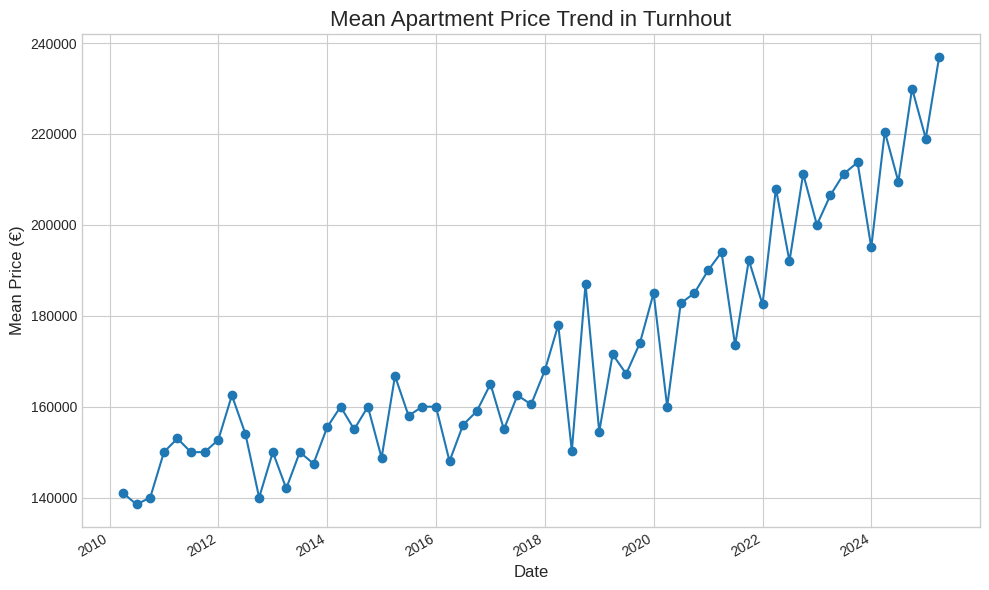

In [36]:
import matplotlib.pyplot as plt

# Set a style for a nicer look
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure and axis for our plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data:
# - The x-axis is the date (our DataFrame's index)
# - The y-axis is the 'mean_euro_apartments' column
# We'll add a marker to see each data point clearly
ax.plot(turnhout_df.index, turnhout_df['mean_euro_apartments'], marker='o', linestyle='-')

# Add a title and labels to make the graph easy to understand
ax.set_title('Mean Apartment Price Trend in Turnhout', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Price (€)', fontsize=12)

# Automatically format the date labels to prevent them from overlapping
fig.autofmt_xdate()

# Ensure everything fits nicely
plt.tight_layout()

# Save the plot as an image file
plt.savefig(cwd.parent / "figures" /'turnhout_apartment_prices.png')

# To display the plot in environments like Jupyter notebooks
plt.show()

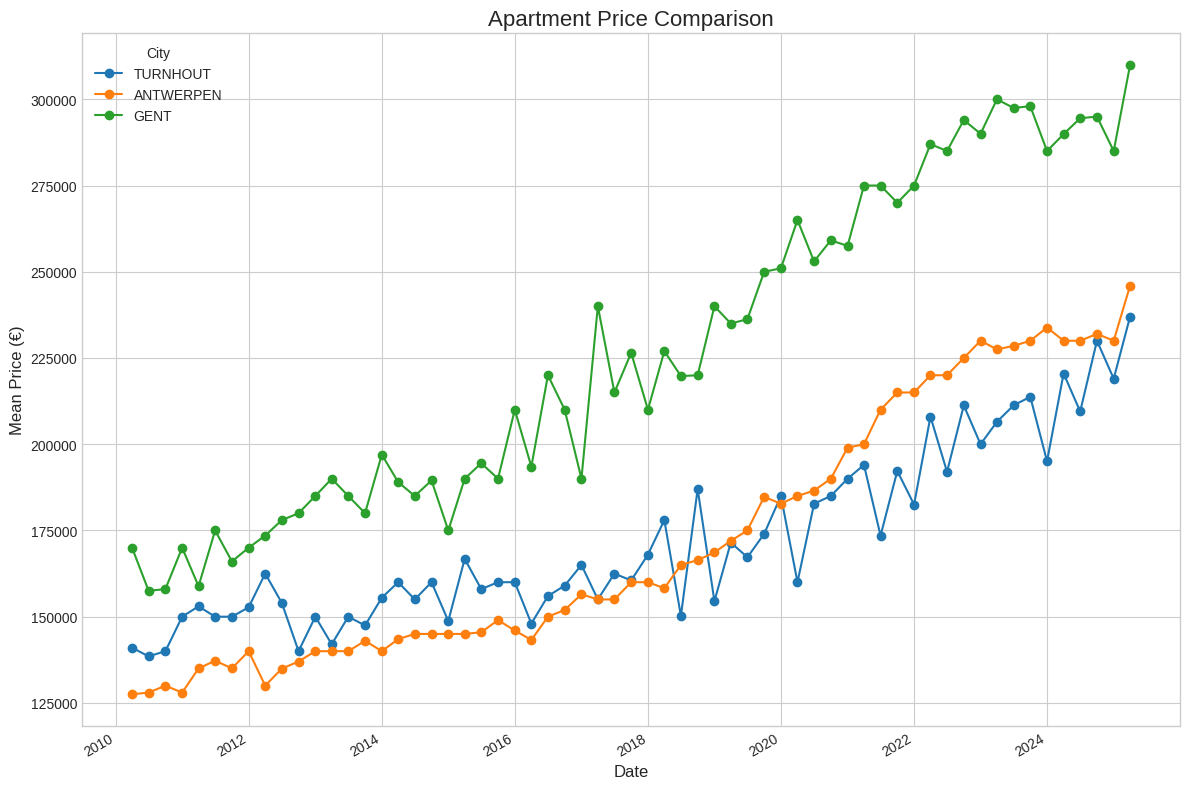

In [37]:
# 1. List the cities you want to compare
cities_to_compare = ['TURNHOUT', 'ANTWERPEN', 'GENT']

# 2. Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# 3. Loop through each city, filter its data, and plot it
for city in cities_to_compare:
    # Filter the DataFrame for the current city
    city_df = df[df['lokaliteit'] == city].copy()

    # Drop any missing values to avoid errors
    city_df.dropna(subset=['mean_euro_apartments'], inplace=True)

    if not city_df.empty:
        # Plot the mean apartment price for the city
        ax.plot(city_df.index, city_df['mean_euro_apartments'], marker='o', linestyle='-', label=city)

# 4. Add titles, labels, and a legend
ax.set_title('Apartment Price Comparison', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Price (€)', fontsize=12)
ax.legend(title='City') # The legend will use the labels we set in the loop

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

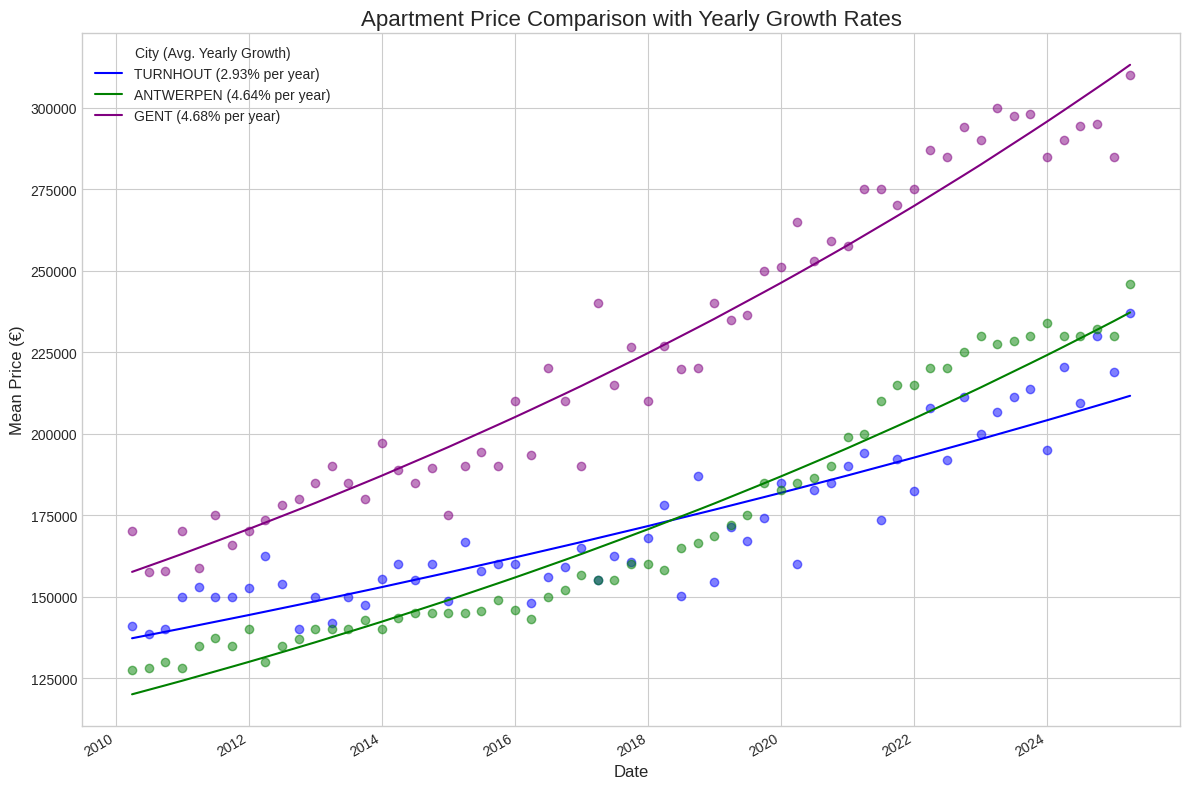

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have your original DataFrame 'df' ready

# 1. List the cities and set up colors
cities_to_compare = ['TURNHOUT', 'ANTWERPEN', 'GENT']
colors = ['blue', 'green', 'purple']

# 2. Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# 3. Loop through each city to plot and calculate
for i, city in enumerate(cities_to_compare):
    city_df = df[df['lokaliteit'] == city].copy()
    city_df.dropna(subset=['mean_euro_apartments'], inplace=True)

    if not city_df.empty:
        color = colors[i % len(colors)]
        
        # Plot the original data points
        ax.plot(city_df.index, city_df['mean_euro_apartments'],
                marker='o', linestyle=' ', color=color, alpha=0.5)

        # --- Calculate and Plot Exponential Trend ---
        x_numeric = np.arange(len(city_df))
        y_values = city_df['mean_euro_apartments']
        
        # This part remains the same
        m, b = np.polyfit(x_numeric, np.log(y_values), 1)
        exponential_trend = np.exp(m * x_numeric + b)

        # --- New: Calculate YEARLY Growth Rate ---
        # We compound the quarterly rate (m) over 4 quarters
        yearly_growth_rate = (np.exp(4 * m) - 1) * 100
        
        # Plot the trendline with the yearly growth rate in the label
        ax.plot(city_df.index, exponential_trend,
                linestyle='-', color=color, 
                label=f'{city} ({yearly_growth_rate:.2f}% per year)')

# 4. Add titles, labels, and a legend
ax.set_title('Apartment Price Comparison with Yearly Growth Rates', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Price (€)', fontsize=12)
ax.legend(title='City (Avg. Yearly Growth)')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()